## Drive ile bağlantı kurma

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# Kütüphanelerin Kurulumu

In [21]:
!pip install -q keras

In [23]:
import numpy as np
from PIL import Image
from keras.applications.vgg16 import VGG16 # önceden eğitilmiş modelin import edilmesi
from keras.applications.vgg16 import preprocess_input,decode_predictions


## Keras'da önceden ImageNet veri kümesinde eğitilmiş bir modeli yüklenmesi

In [24]:
model = VGG16(weights= 'imagenet', include_top=True)

## Modelin Yapısı

In [6]:
layers = dict([(layer.name,layer.output) for layer in model.layers])
layers

{'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 'block3_pool': <KerasTensor: shap

In [7]:
model.count_params() # bu model tasarlanırken kullanılan parametre sayısı

138357544

In [43]:
# drive da bulunduğumuz klasörün içindeki test görüntülerimizin isimlerini görelim ve test işlemleri için görselleri çağıralım
import os
os.chdir('/gdrive/MyDrive/KerasEgitimi/images')

In [44]:
!ls

betty.jpg  f16.jpg  inek.jpg  olips3.jpeg  olips.jpeg


## Test resminin yüklenmesi

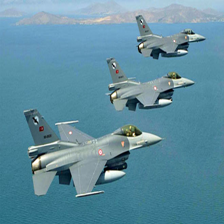

In [45]:
image_path = 'f16.jpg'
image = Image.open(image_path)
image = image.resize((224,224))
image

In [46]:
x = np.array(image, dtype = 'float32') # görüntüyü diziye çevirir
x = np.expand_dims(x,axis=0) # dizi listesine çevirir
x = preprocess_input(x)

# Test Görüntüsü ile Sınıflama Yapma

In [47]:
preds = model.predict(x)
print("predicted : ",decode_predictions(preds, top=3)[0])
print(decode_predictions(preds,top=1)[0][0][1])

predicted :  [('n04552348', 'warplane', 0.7675899), ('n02687172', 'aircraft_carrier', 0.14120407), ('n01494475', 'hammerhead', 0.041954637)]
warplane
